In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras

In [2]:
# ============================================================================
# ÉTAPE 1: GÉNÉRATION DU DATAFRAME (BASE COMMUNE)
# ============================================================================
print("=" * 70)
print("ÉTAPE 1: GÉNÉRATION DU DATAFRAME")
print("=" * 70)

np.random.seed(42)
n_samples = 100

surface = np.random.uniform(30, 200, n_samples)
prix = 2000 * surface + np.random.normal(0, 20000, n_samples)

df = pd.DataFrame({
    'Surface_m2': surface,
    'Prix_euros': prix
})

print(df.head(10))
print(f"\nNombre de lignes: {len(df)}")
print(f"\nStatistiques descriptives:")
print(df.describe())

ÉTAPE 1: GÉNÉRATION DU DATAFRAME
   Surface_m2     Prix_euros
0   93.671820  189084.581773
1  191.621432  377262.717170
2  154.438970  310713.155747
3  131.771942  223792.506335
4   56.523169  108652.899994
5   56.519068  120180.388345
6   39.874214  109306.309032
7  177.249945  344134.485198
8  132.189552  248209.231935
9  150.372338  290709.535579

Nombre de lignes: 100

Statistiques descriptives:
       Surface_m2     Prix_euros
count  100.000000     100.000000
mean   109.930726  219839.845545
std     50.573200  100052.923221
min     30.938760   56988.793545
25%     62.844129  134516.418553
50%    108.904217  210180.201505
75%    154.134530  309151.856518
max    197.770779  411178.015880


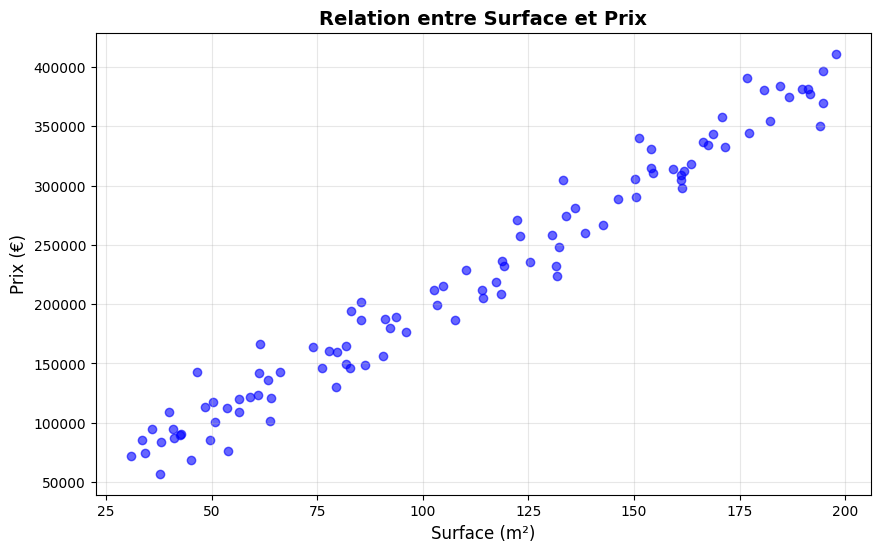

In [3]:
# Visualisation initiale
plt.figure(figsize=(10, 6))
plt.scatter(df['Surface_m2'], df['Prix_euros'], alpha=0.6, color='blue')
plt.xlabel('Surface (m²)', fontsize=12)
plt.ylabel('Prix (€)', fontsize=12)
plt.title('Relation entre Surface et Prix', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
# Préparation des données
X = df[['Surface_m2']].values
y = df['Prix_euros'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n✓ Données d'entraînement: {len(X_train)} échantillons")
print(f"✓ Données de test: {len(X_test)} échantillons")




✓ Données d'entraînement: 80 échantillons
✓ Données de test: 20 échantillons


In [5]:
# ============================================================================
# ÉTAPE 2A: IMPLÉMENTATION MANUELLE - GRADIENT DESCENT
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 2A: IMPLÉMENTATION MANUELLE - GRADIENT DESCENT")
print("=" * 70)

# Normalisation des données
X_mean, X_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()
X_train_norm = (X_train - X_mean) / X_std
y_train_norm = (y_train - y_mean) / y_std

# PARAMÈTRES INITIAUX
theta_0 = 0.0  # θ₀ (biais/intercept)
theta_1 = 0.0  # θ₁ (pente/coefficient)
alpha = 0.01   # α (learning rate)
n_iterations = 1000

print(f"\n📊 PARAMÈTRES:")
print(f"   θ₀ (theta_0): {theta_0}")
print(f"   θ₁ (theta_1): {theta_1}")
print(f"   α (alpha/learning rate): {alpha}")
print(f"   Nombre d'itérations: {n_iterations}")


ÉTAPE 2A: IMPLÉMENTATION MANUELLE - GRADIENT DESCENT

📊 PARAMÈTRES:
   θ₀ (theta_0): 0.0
   θ₁ (theta_1): 0.0
   α (alpha/learning rate): 0.01
   Nombre d'itérations: 1000


In [6]:
# Fonction de loss (MSE)
def compute_loss(X, y, theta_0, theta_1):
    """Calcule la fonction de perte MSE"""
    m = len(y)
    predictions = theta_0 + theta_1 * X.flatten()
    loss = (1/(2*m)) * np.sum((predictions - y)**2)
    return loss


In [7]:
# Descente de gradient
loss_history = []
theta_0_history = [theta_0]
theta_1_history = [theta_1]
m = len(X_train_norm)

print("\n🔄 ENTRAÎNEMENT...")
for i in range(n_iterations):
    # Prédictions
    predictions = theta_0 + theta_1 * X_train_norm.flatten()

    # Calcul des gradients
    gradient_theta_0 = (1/m) * np.sum(predictions - y_train_norm)
    gradient_theta_1 = (1/m) * np.sum((predictions - y_train_norm) * X_train_norm.flatten())

    # Mise à jour: θ = θ - α × gradient
    theta_0 = theta_0 - alpha * gradient_theta_0
    theta_1 = theta_1 - alpha * gradient_theta_1

    # Enregistrement
    loss = compute_loss(X_train_norm, y_train_norm, theta_0, theta_1)
    loss_history.append(loss)
    theta_0_history.append(theta_0)
    theta_1_history.append(theta_1)

    if i % 200 == 0:
        print(f"   Itération {i:4d}: Loss = {loss:.6f}")

print(f"\n✅ PARAMÈTRES FINAUX (normalisés):")
print(f"   θ₀: {theta_0:.4f}")
print(f"   θ₁: {theta_1:.4f}")
print(f"   Loss finale: {loss_history[-1]:.6f}")



🔄 ENTRAÎNEMENT...
   Itération    0: Loss = 0.490398
   Itération  200: Loss = 0.025991
   Itération  400: Loss = 0.017655
   Itération  600: Loss = 0.017505
   Itération  800: Loss = 0.017502

✅ PARAMÈTRES FINAUX (normalisés):
   θ₀: 0.0000
   θ₁: 0.9823
   Loss finale: 0.017502


In [8]:
# Dénormalisation
real_theta_1 = theta_1 * (y_std / X_std)
real_theta_0 = y_mean + theta_0 * y_std - real_theta_1 * X_mean

print(f"\n📈 PARAMÈTRES RÉELS:")
print(f"   Intercept (θ₀): {real_theta_0:,.2f} €")
print(f"   Pente (θ₁): {real_theta_1:,.2f} €/m²")


📈 PARAMÈTRES RÉELS:
   Intercept (θ₀): 4,284.04 €
   Pente (θ₁): 1,952.70 €/m²


In [9]:
# ============================================================================
# ÉTAPE 2B: VISUALISATIONS - GRADIENT DESCENT
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 2B: VISUALISATIONS DU GRADIENT DESCENT")
print("=" * 70)

plt.figure(figsize=(16, 10))



ÉTAPE 2B: VISUALISATIONS DU GRADIENT DESCENT


<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

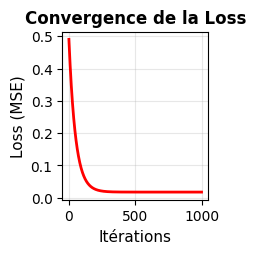

In [10]:
# Graph 1: Convergence de la Loss
plt.subplot(2, 3, 1)
plt.plot(loss_history, color='red', linewidth=2)
plt.xlabel('Itérations', fontsize=11)
plt.ylabel('Loss (MSE)', fontsize=11)
plt.title('Convergence de la Loss', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

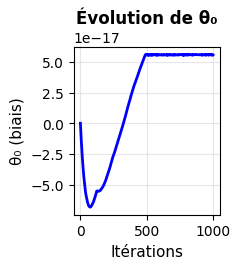

In [11]:
# Graph 2: Évolution de θ₀
plt.subplot(2, 3, 2)
plt.plot(theta_0_history, color='blue', linewidth=2)
plt.xlabel('Itérations', fontsize=11)
plt.ylabel('θ₀ (biais)', fontsize=11)
plt.title('Évolution de θ₀', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)


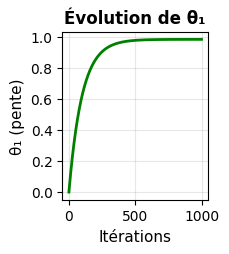

In [12]:
# Graph 3: Évolution de θ₁
plt.subplot(2, 3, 3)
plt.plot(theta_1_history, color='green', linewidth=2)
plt.xlabel('Itérations', fontsize=11)
plt.ylabel('θ₁ (pente)', fontsize=11)
plt.title('Évolution de θ₁', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

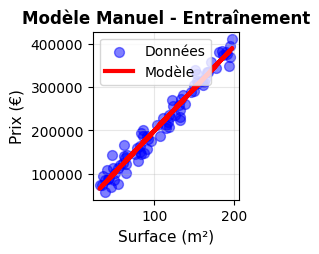

In [13]:
# Graph 4: Modèle sur entraînement
plt.subplot(2, 3, 4)
y_train_pred_manual = real_theta_0 + real_theta_1 * X_train
plt.scatter(X_train, y_train, alpha=0.5, color='blue', s=50, label='Données')
plt.plot(X_train, y_train_pred_manual, color='red', linewidth=3, label='Modèle')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('Modèle Manuel - Entraînement', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

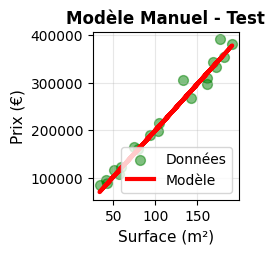

In [14]:
# Graph 5: Modèle sur test
plt.subplot(2, 3, 5)
y_test_pred_manual = real_theta_0 + real_theta_1 * X_test
plt.scatter(X_test, y_test, alpha=0.5, color='green', s=50, label='Données')
plt.plot(X_test, y_test_pred_manual, color='red', linewidth=3, label='Modèle')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('Modèle Manuel - Test', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

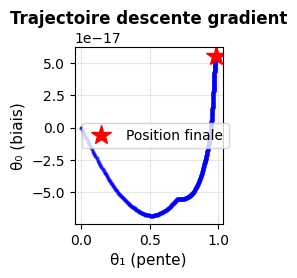

In [15]:
# Graph 6: Trajectoire
plt.subplot(2, 3, 6)
plt.plot(theta_1_history, theta_0_history, 'bo-', markersize=2, alpha=0.6)
plt.plot(theta_1, theta_0, 'r*', markersize=15, label='Position finale')
plt.xlabel('θ₁ (pente)', fontsize=11)
plt.ylabel('θ₀ (biais)', fontsize=11)
plt.title('Trajectoire descente gradient', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [16]:
# Performance
mse_manual = mean_squared_error(y_test, y_test_pred_manual)
r2_manual = r2_score(y_test, y_test_pred_manual)
print(f"\n📊 PERFORMANCE:")
print(f"   MSE: {mse_manual:,.2f}")
print(f"   R²: {r2_manual:.4f}")


📊 PERFORMANCE:
   MSE: 261,465,421.27
   R²: 0.9757


In [17]:
# ============================================================================
# ÉTAPE 3: MODÈLE AVEC SCIKIT-LEARN
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 3: MODÈLE AVEC SCIKIT-LEARN")
print("=" * 70)

# Entraînement
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

# Récupération des paramètres
sklearn_intercept = model_sklearn.intercept_
sklearn_coef = model_sklearn.coef_[0]

print(f"\n✅ PARAMÈTRES SKLEARN:")
print(f"   Intercept: {sklearn_intercept:,.2f} €")
print(f"   Pente (coef_): {sklearn_coef:,.2f} €/m²")



ÉTAPE 3: MODÈLE AVEC SCIKIT-LEARN

✅ PARAMÈTRES SKLEARN:
   Intercept: 4,274.81 €
   Pente (coef_): 1,952.78 €/m²


In [18]:
# Prédictions
y_train_pred_sklearn = model_sklearn.predict(X_train)
y_test_pred_sklearn = model_sklearn.predict(X_test)

# Performance
mse_sklearn = mean_squared_error(y_test, y_test_pred_sklearn)
r2_sklearn = r2_score(y_test, y_test_pred_sklearn)

print(f"\n📊 PERFORMANCE:")
print(f"   MSE: {mse_sklearn:,.2f}")
print(f"   R²: {r2_sklearn:.4f}")


📊 PERFORMANCE:
   MSE: 261,479,805.49
   R²: 0.9757


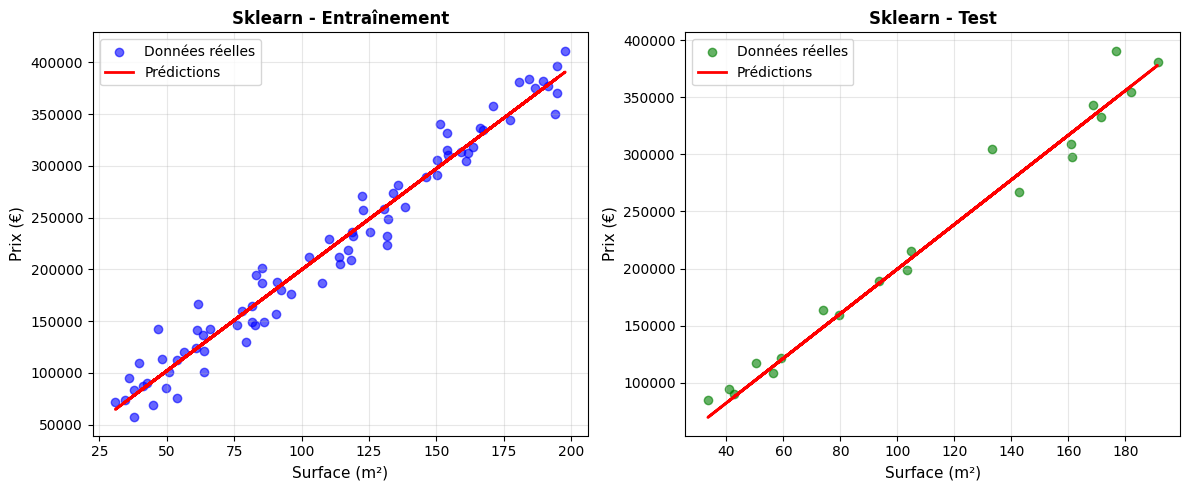

In [19]:
# Visualisation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Données réelles')
plt.plot(X_train, y_train_pred_sklearn, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('Sklearn - Entraînement', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Données réelles')
plt.plot(X_test, y_test_pred_sklearn, color='red', linewidth=2, label='Prédictions')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('Sklearn - Test', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [20]:
# ============================================================================
# ÉTAPE 4: MODÈLE AVEC TENSORFLOW
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 4: RÉGRESSION SIMPLE AVEC TENSORFLOW")
print("=" * 70)

# Normalisation
X_train_tf = (X_train - X_train.mean()) / X_train.std()
y_train_tf = (y_train - y_train.mean()) / y_train.std()
X_test_tf = (X_test - X_train.mean()) / X_train.std()



ÉTAPE 4: RÉGRESSION SIMPLE AVEC TENSORFLOW


In [21]:
# Construction du modèle
model_tf = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

# Compilation
model_tf.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='mse',
    metrics=['mae']
)

print("\n🔄 ENTRAÎNEMENT TENSORFLOW...")



🔄 ENTRAÎNEMENT TENSORFLOW...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Entraînement
history = model_tf.fit(
    X_train_tf, y_train_tf,
    epochs=1000,
    verbose=0,
    validation_split=0.2
)

# Récupération des paramètres
weights = model_tf.get_weights()
tf_weight = weights[0][0][0]
tf_bias = weights[1][0]

In [23]:
# Dénormalisation
tf_real_coef = tf_weight * (y_train.std() / X_train.std())
tf_real_intercept = y_train.mean() + tf_bias * y_train.std() - tf_real_coef * X_train.mean()

print(f"\n✅ PARAMÈTRES TENSORFLOW:")
print(f"   Intercept: {tf_real_intercept:,.2f} €")
print(f"   Pente: {tf_real_coef:,.2f} €/m²")

# Prédictions
y_train_pred_tf = model_tf.predict(X_train_tf, verbose=0) * y_train.std() + y_train.mean()
y_test_pred_tf = model_tf.predict(X_test_tf, verbose=0) * y_train.std() + y_train.mean()

# Performance
mse_tf = mean_squared_error(y_test, y_test_pred_tf)
r2_tf = r2_score(y_test, y_test_pred_tf)

print(f"\n📊 PERFORMANCE:")
print(f"   MSE: {mse_tf:,.2f}")
print(f"   R²: {r2_tf:.4f}")



✅ PARAMÈTRES TENSORFLOW:
   Intercept: 7,555.84 €
   Pente: 1,921.28 €/m²

📊 PERFORMANCE:
   MSE: 260,511,703.28
   R²: 0.9758


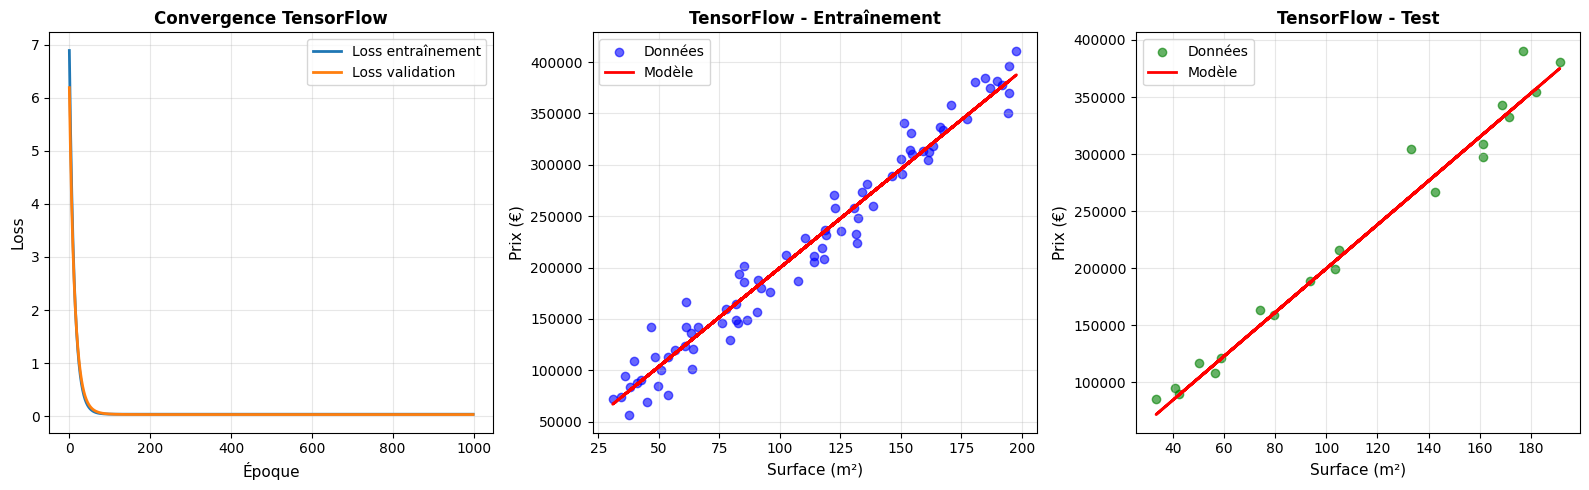

In [24]:
# Visualisation
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Loss entraînement', linewidth=2)
plt.plot(history.history['val_loss'], label='Loss validation', linewidth=2)
plt.xlabel('Époque', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.title('Convergence TensorFlow', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, alpha=0.6, color='blue', label='Données')
plt.plot(X_train, y_train_pred_tf, color='red', linewidth=2, label='Modèle')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('TensorFlow - Entraînement', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, alpha=0.6, color='green', label='Données')
plt.plot(X_test, y_test_pred_tf, color='red', linewidth=2, label='Modèle')
plt.xlabel('Surface (m²)', fontsize=11)
plt.ylabel('Prix (€)', fontsize=11)
plt.title('TensorFlow - Test', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [25]:
# ============================================================================
# ÉTAPE 5: COMPARAISON FINALE DES 3 MÉTHODES
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 5: COMPARAISON DES 3 MÉTHODES")
print("=" * 70)

# Tableau comparatif
comparison_df = pd.DataFrame({
    'Méthode': ['Manuel (Gradient Descent)', 'Scikit-Learn', 'TensorFlow'],
    'Intercept (€)': [real_theta_0, sklearn_intercept, tf_real_intercept],
    'Pente (€/m²)': [real_theta_1, sklearn_coef, tf_real_coef],
    'MSE': [mse_manual, mse_sklearn, mse_tf],
    'R² Score': [r2_manual, r2_sklearn, r2_tf]
})

print("\n" + comparison_df.to_string(index=False))


ÉTAPE 5: COMPARAISON DES 3 MÉTHODES

                  Méthode  Intercept (€)  Pente (€/m²)          MSE  R² Score
Manuel (Gradient Descent)    4284.043040   1952.697733 2.614654e+08  0.975692
             Scikit-Learn    4274.805278   1952.782037 2.614798e+08  0.975691
               TensorFlow    7555.841406   1921.276260 2.605117e+08  0.975781


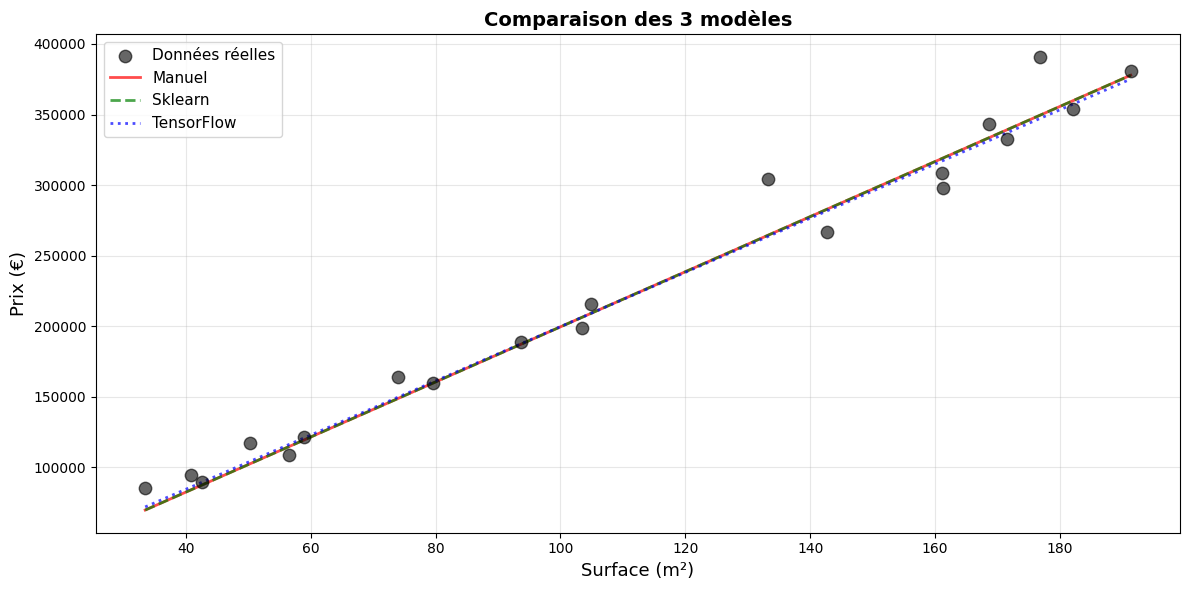

In [26]:
# Visualisation comparative
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, alpha=0.6, color='black', s=80, label='Données réelles', zorder=5)
plt.plot(np.sort(X_test, axis=0), real_theta_0 + real_theta_1 * np.sort(X_test, axis=0),
         'r-', linewidth=2, label='Manuel', alpha=0.7)
plt.plot(np.sort(X_test, axis=0), model_sklearn.predict(np.sort(X_test, axis=0)),
         'g--', linewidth=2, label='Sklearn', alpha=0.7)
plt.plot(np.sort(X_test, axis=0),
         model_tf.predict((np.sort(X_test, axis=0) - X_train.mean()) / X_train.std(), verbose=0) * y_train.std() + y_train.mean(),
         'b:', linewidth=2, label='TensorFlow', alpha=0.7)
plt.xlabel('Surface (m²)', fontsize=13)
plt.ylabel('Prix (€)', fontsize=13)
plt.title('Comparaison des 3 modèles', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [29]:
# ============================================================================
# ÉTAPE 6: PRÉDICTIONS SUR NOUVELLES DONNÉES
# ============================================================================
print("\n" + "=" * 70)
print("ÉTAPE 6: PRÉDICTIONS SUR NOUVELLES SURFACES")
print("=" * 70)

nouvelles_surfaces = np.array([[75], [120], [150]])

print("\n🔮 PRÉDICTIONS:")
for surf in nouvelles_surfaces:
    # Manuel
    prix_manuel = real_theta_0 + real_theta_1 * surf[0]
    # Sklearn
    prix_sklearn = model_sklearn.predict([[surf[0]]])[0]
    # TensorFlow
    surf_norm = (surf[0] - X_train.mean()) / X_train.std()
    prix_tf = model_tf.predict([[surf_norm]], verbose=0)[0][0] * y_train.std() + y_train.mean()

    print(f"\nSurface: {surf[0]:.0f} m²")
    print(f"   Manuel:     {prix_manuel:>10,.2f} €")
    print(f"   Sklearn:    {prix_sklearn:>10,.2f} €")
    print(f"   TensorFlow: {prix_tf:>10,.2f} €")

print("\n" + "=" * 70)
print("✅ ANALYSE COMPLÈTE TERMINÉE!")
print("=" * 70)


ÉTAPE 6: PRÉDICTIONS SUR NOUVELLES SURFACES

🔮 PRÉDICTIONS:


IndexError: tuple index out of range